For a week and a half or so I had a problam with the platform (sorry about the delay), I have tried 'Feature Scaling' and 'Upsampling' on top of 'Class weight adjustment' (I didnt know how to place a diffrent threshold.

# Introduction
In this project I will train the best model to predict whether a customer will leave the bank.
## Outlines
1. I go over the data file and learn it.
2. Understand which hyperparameters are the best for the model.
### Tasks
I will understand which model is having better prediction score.
### Description of Data Source
The data is built from the bank data.
## Table of Contents:
1.Unfolding of the data.
2. Studying and checking the data.
3. Testing the models.
4. Conclusions and recommendations.

### 1. Opening the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0        2.0       0.00              1          1               1   
1        1.0   83807.86              1          0               1   
2        8.0  159660.80              3          1               0   
3        1.0       0.00              2          0               0   
4        2.0  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995     5.0       0.00              2          1               0   
9996    10.0   57369.61              1          1               1   
9997     7.0       0.00              1          0               1   
9998     3.0   75075.31              2          1               0   
9999     NaN  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

Most of the date is made from numericals but some are objects.

In [3]:
data.shape

(10000, 14)

In [4]:
data.describe()

RowNumber    CustomerId   CreditScore           Age       Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  9091.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800     4.997690   
std     2886.89568  7.193619e+04     96.653299     10.487806     2.894723   
min        1.00000  1.556570e+07    350.000000     18.000000     0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000     2.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000     5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000     7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
data = data.dropna()

In [7]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

I think we can work without these.

In [8]:
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42     2.0       0.00              1          1   
1             608   41     1.0   83807.86              1          0   
2             502   42     8.0  159660.80              3          1   
3             699   39     1.0       0.00              2          0   
4             850   43     2.0  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9994          800   29     2.0       0.00              2          0   
9995          771   39     5.0       0.00              2          1   
9996          516   35    10.0   57369.61              1          1   
9997          709   36     7.0       0.00              1          0   
9998          772   42     3.0   75075.31              2          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1                  0   
1                  1        112542.58       0                  0   
2                  0        113931.57       1                  0   
3                  0         93826.63       0                  0   
4                  1         79084.10       0                  0   
...              ...              ...     ...                ...   
9994               0        167773.55       0                  0   
9995               0         96270.64       0                  0   
9996               1        101699.77       0                  0   
9997               1         42085.58       1                  0   
9998               0         92888.52       1                  1   

      Geography_Spain  Gender_Male  
0                   0            0  
1                   1            0  
2                   0            0  
3                   0            0  
4                   1            0  
...               ...          ...  
9994                0            0  
9995                0            1  
9996                0            1  
9997                0            0  
9998                0            1  

[9091 rows x 12 columns]

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>],
       [<AxesSubplot:title={'center':'Geography_Germany'}>,
        <AxesSubplot:title={'center':'Geography_Spain'}>,
        <AxesSubplot:title={'center':'Gender_Male'}>]], dtype=object)

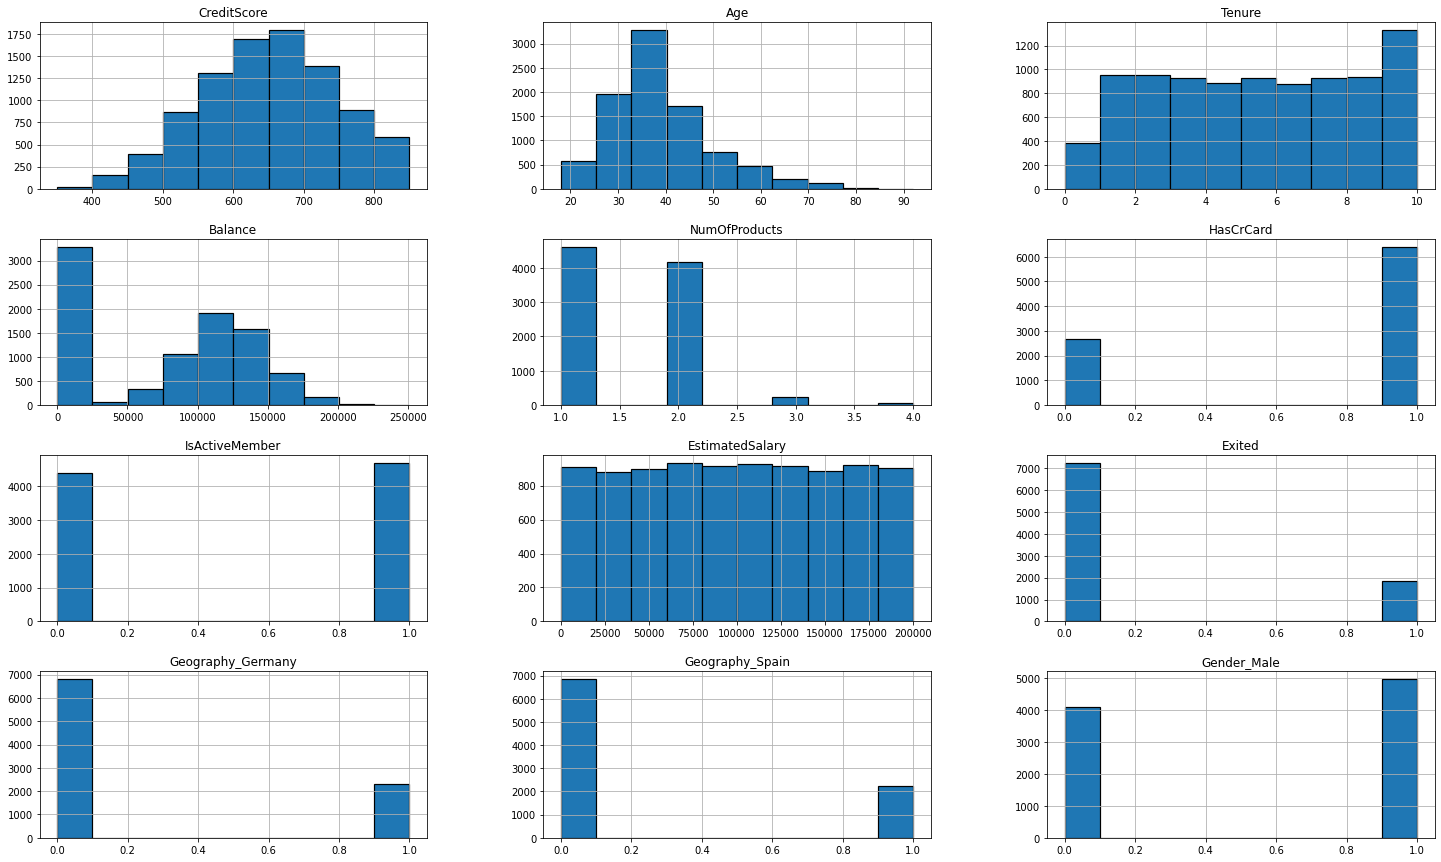

In [9]:
data_ohe.hist(edgecolor = 'black', linewidth = 1.2, figsize = (25,15))

Some features are not balaced due to lack of naturality in the economic sector.
Due to the diffrent 'weight' of features such as (age & credit score) balance needs to be achieved. It seems there are less people who exited than stayed so upsampling the 'positive' is needed.

In [10]:
data_ohe.columns = data_ohe.columns.str.lower()

### 2. Spliting the data

In [11]:
features = data_ohe[['creditscore','age','tenure','balance','numofproducts','hascrcard','isactivemember','estimatedsalary','geography_germany', 'geography_spain', 'gender_male']]
target = data_ohe['exited']

features_train, features_remain, target_train, target_remain = train_test_split(features,target, train_size=0.6, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(features_remain,target_remain, test_size=0.5, random_state=12345)

<div class="alert alert-block alert-info">
<b>I changed it to by your recommendation.</b> <a class="tocSkip"></a>
</div>

Standerdazing numerical features.

In [12]:
numeric = ['creditscore','age','tenure','balance','numofproducts','hascrcard','isactivemember','estimatedsalary','geography_germany', 'geography_spain', 'gender_male']

In [13]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

/tmp/ipykernel_83/3916794607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_83/3916794607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

fit_transform() is also an option.

Upsampling The Data

In [14]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    return features_upsampled, target_upsampled

In [15]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

In [16]:
features_zeros.shape

(4328, 11)

In [17]:
features_ones.shape

(1126, 11)

In [18]:
target_zeros.shape

(4328,)

In [19]:
target_ones.shape

(1126,)

should randomazie upsampling...

As shown, the 0 are 4X more than the 1 so upsampling can balance the numbers to recieve 'more' data.

In [20]:
repeat = 4
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

In [21]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [22]:
features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

In [23]:
features_zeros = features_upsampled[target_upsampled == 0]
features_ones = features_upsampled[target_upsampled == 1]
target_zeros = target_upsampled[target_upsampled == 0]
target_ones = target_upsampled[target_upsampled == 1]

In [24]:
features_zeros.shape

(4328, 11)

In [25]:
features_ones.shape

(4504, 11)

In [26]:
target_zeros.shape

(4328,)

In [27]:
target_ones.shape

(4504,)

There is preety much the same number of 0 as there are 1.

I changed the number of 'repeat' so there will be the same 1 as there are 0, should I go over a specific part of the course in order the achive understanding?

checking f1 score on raw data.

### 3. Investigating hyperparameters


Threshold Adjusment

In [29]:
model = RandomForestClassifier(random_state=12345, n_estimators = 75)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [30]:
for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid,predicted_valid)
    recall = recall_score(target_valid,predicted_valid)
    f1_scores = 2*recall*precision/(recall+precision)

    print(
        	'Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, f1_scores = {:.2f}'.format(
            	threshold, precision, recall, f1_scores
        	)
    	)

Threshold = 0.00 | Precision = 0.218, Recall = 0.992, f1_scores = 0.36
Threshold = 0.02 | Precision = 0.228, Recall = 0.981, f1_scores = 0.37
Threshold = 0.04 | Precision = 0.255, Recall = 0.979, f1_scores = 0.40
Threshold = 0.06 | Precision = 0.267, Recall = 0.968, f1_scores = 0.42
Threshold = 0.08 | Precision = 0.292, Recall = 0.950, f1_scores = 0.45
Threshold = 0.10 | Precision = 0.305, Recall = 0.942, f1_scores = 0.46
Threshold = 0.12 | Precision = 0.327, Recall = 0.923, f1_scores = 0.48
Threshold = 0.14 | Precision = 0.345, Recall = 0.910, f1_scores = 0.50
Threshold = 0.16 | Precision = 0.368, Recall = 0.889, f1_scores = 0.52
Threshold = 0.18 | Precision = 0.380, Recall = 0.870, f1_scores = 0.53
Threshold = 0.20 | Precision = 0.400, Recall = 0.836, f1_scores = 0.54
Threshold = 0.22 | Precision = 0.411, Recall = 0.828, f1_scores = 0.55
Threshold = 0.24 | Precision = 0.434, Recall = 0.801, f1_scores = 0.56
Threshold = 0.26 | Precision = 0.454, Recall = 0.790, f1_scores = 0.58
Thresh

adding f1 score to the output.

In [31]:
model = RandomForestClassifier(n_estimators = 75, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

In [32]:
threshold = 0.42

predicted_proba = model.predict_proba(features_valid)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

f1_score(target_valid, predicted)

0.6306306306306306

### 4. Quality check


In [33]:
f1_score(target_valid, predicted_valid)

0.622093023255814

In [34]:
threshold = 0.42

predicted_proba = model.predict_proba(features_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

f1_score(target_test, predicted)

0.15699100572363042

The F1 score on the valid data set look promising and above the 0.58 needed score.

In [35]:
predicted_test = model.predict(features_test)
f1_score(target_test ,predicted_test)

0.11798839458413925

The test data set dropped the F1 score by alot.

In [36]:
model = LogisticRegression(random_state=12345, solver='liblinear') 
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

In [37]:
f1_score(target_valid, predicted_valid)

0.5081374321880651

It seems logistic regression isn't the best nodel so far.

In [38]:
predicted_test = model.predict(features_test)
f1_score(target_test, predicted_test)

0.3235023041474654

With the test data set it shown a better result than random forest classifier.

Balancing The Data

Threshold Adjusment

In [40]:
model = RandomForestClassifier(random_state=12345, n_estimators = 75, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [41]:
for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid,predicted_valid)
    recall = recall_score(target_valid,predicted_valid)
    f1_scores = 2*recall*precision/(recall+precision)

    print(
        	'Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, f1_scores = {:.2f}'.format(
            	threshold, precision, recall, f1_scores
        	)
    	)

Threshold = 0.00 | Precision = 0.223, Recall = 0.995, f1_scores = 0.36
Threshold = 0.02 | Precision = 0.238, Recall = 0.981, f1_scores = 0.38
Threshold = 0.04 | Precision = 0.277, Recall = 0.960, f1_scores = 0.43
Threshold = 0.06 | Precision = 0.295, Recall = 0.947, f1_scores = 0.45
Threshold = 0.08 | Precision = 0.327, Recall = 0.926, f1_scores = 0.48
Threshold = 0.10 | Precision = 0.345, Recall = 0.915, f1_scores = 0.50
Threshold = 0.12 | Precision = 0.374, Recall = 0.883, f1_scores = 0.53
Threshold = 0.14 | Precision = 0.395, Recall = 0.873, f1_scores = 0.54
Threshold = 0.16 | Precision = 0.436, Recall = 0.851, f1_scores = 0.58
Threshold = 0.18 | Precision = 0.457, Recall = 0.833, f1_scores = 0.59
Threshold = 0.20 | Precision = 0.487, Recall = 0.785, f1_scores = 0.60
Threshold = 0.22 | Precision = 0.501, Recall = 0.767, f1_scores = 0.61
Threshold = 0.24 | Precision = 0.529, Recall = 0.737, f1_scores = 0.62
Threshold = 0.26 | Precision = 0.542, Recall = 0.721, f1_scores = 0.62
Thresh

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_83/3757555220.py:5: RuntimeWarning: invalid value encountered in double_scalars
  f1_scores = 2*recall*precision/(recall+precision)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_83/3757555220.py:5: RuntimeWarning: invalid value encountered in double_scalars
  f1_scores = 2*recall*precision/(recall+precision)


In [42]:
model = RandomForestClassifier(n_estimators = 58, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

In [43]:
threshold = 0.34

predicted_proba = model.predict_proba(features_valid)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

f1_score(target_valid, predicted)

0.6159999999999999

In [44]:
f1_score(target_valid, predicted_valid)

0.584873949579832

In [45]:
threshold = 0.34

predicted_proba = model.predict_proba(features_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

f1_score(target_test, predicted)

0.1675977653631285

In [46]:
predicted_test = model.predict(features_test)
f1_score(target_test ,predicted_test)

0.09049773755656108

In [47]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

In [48]:
f1_score(target_valid, predicted_valid)

0.509731232622799

In [49]:
predicted_test = model.predict(features_test)
f1_score(target_test, predicted_test)

0.3235023041474654

Downsampling The Data

In [50]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

In [51]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.4)

Threshold Adjusment

In [53]:
model = RandomForestClassifier(random_state=12345, n_estimators = 75)
model.fit(features_downsampled, target_downsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [54]:
for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid,predicted_valid)
    recall = recall_score(target_valid,predicted_valid)
    f1_scores = 2*recall*precision/(recall+precision)

    print(
        	'Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, f1_scores = {:.2f}'.format(
            	threshold, precision, recall, f1_scores
        	)
    	)

Threshold = 0.00 | Precision = 0.210, Recall = 1.000, f1_scores = 0.35
Threshold = 0.02 | Precision = 0.215, Recall = 1.000, f1_scores = 0.35
Threshold = 0.04 | Precision = 0.229, Recall = 0.995, f1_scores = 0.37
Threshold = 0.06 | Precision = 0.234, Recall = 0.987, f1_scores = 0.38
Threshold = 0.08 | Precision = 0.248, Recall = 0.979, f1_scores = 0.40
Threshold = 0.10 | Precision = 0.255, Recall = 0.979, f1_scores = 0.40
Threshold = 0.12 | Precision = 0.274, Recall = 0.973, f1_scores = 0.43
Threshold = 0.14 | Precision = 0.284, Recall = 0.966, f1_scores = 0.44
Threshold = 0.16 | Precision = 0.304, Recall = 0.955, f1_scores = 0.46
Threshold = 0.18 | Precision = 0.312, Recall = 0.947, f1_scores = 0.47
Threshold = 0.20 | Precision = 0.328, Recall = 0.934, f1_scores = 0.49
Threshold = 0.22 | Precision = 0.334, Recall = 0.923, f1_scores = 0.49
Threshold = 0.24 | Precision = 0.350, Recall = 0.905, f1_scores = 0.51
Threshold = 0.26 | Precision = 0.364, Recall = 0.899, f1_scores = 0.52
Thresh

In [55]:
model = RandomForestClassifier(n_estimators = 68, random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

In [56]:
threshold = 0.5

predicted_proba = model.predict_proba(features_valid)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

f1_score(target_valid, predicted)

0.6270783847980999

In [57]:
f1_score(target_valid, predicted_valid)

0.6262135922330097

In [58]:
threshold = 0.5

predicted_proba = model.predict_proba(features_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

f1_score(target_test, predicted)

0.1675977653631285

In [59]:
predicted_test = model.predict(features_test)
f1_score(target_test ,predicted_test)

0.1675977653631285

In [60]:
model = LogisticRegression(random_state=12345, solver='liblinear') 
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

In [61]:
f1_score(target_valid, predicted_valid)

0.4975609756097561

In [62]:
predicted_test = model.predict(features_test)
f1_score(target_test, predicted_test)

0.3235023041474654

AUC_ROC

In [63]:
model = RandomForestClassifier(n_estimators = 74, random_state=12345, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.8609875252412762

The auc_roc score of random forest classifier is quit good (I think)

In [64]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

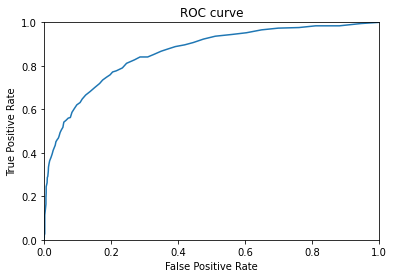

In [65]:
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()
plt.show()

In [66]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.7777479167318597

Here we can see that logistic regression is less compitant.

In [67]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

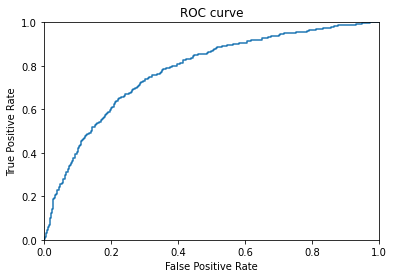

In [68]:
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()
plt.show()

# Conclusion
After going through the models and figuring out which one of them is the most suited one for prediction. I have failed to pass the 0.59 F1 score. LogisticRegression had a better F1 score than RandomForestClassifier but in ROC score the opposite is true, Why I do not know.
## Additionally
For now I will be happy just to know how to improve my skills and my models. 